# **Consumer Complaint Analysis**

## **About the Data**

#### Complaints that the CFPB(Consumer financial Protection Bureau) sends to companies for response are published in the Consumer Complaint Database after the company responds, confirming a commercial relationship with the consumer, or after 15 days, whichever comes first.

## **Problem Statement**






*   #### The lack of complaints or a relatively low number of complaints published in the database about a product, issue, or company does not necessarily mean there is little or no consumer harm.
*  #### Depending on the nature of the financial product and how consumers use the product, consumers may be harmed in ways that do not cause them to complain to the Bureau or to blame the product or provider for the harm they have suffered.

####  **We are going to use the Data and make a Classification Model**


*   Design and build a scalable machine learning pipeline to predict given
  consumer complaint will 	be disputed or not.



## **Data Collection**



*   We are using public dataset of CFBF (Consumer financial Protection Bureau) a U.S. government agency .

* Visit official site to download data set:
https://www.consumerfinance.gov/data-research/consumer-complaints/  
  
*   Download all complaint data | CSV:
https://files.consumerfinance.gov/ccdb/complaints.csv.zip




In [1]:
import gdown

file_id = '1BTh25pXt6CThekdfumtMsGtS6e-x6yX0'
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the file
gdown.download(download_url, '/content/complaints.zip', quiet=False)


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1BTh25pXt6CThekdfumtMsGtS6e-x6yX0
From (redirected): https://drive.google.com/uc?export=download&id=1BTh25pXt6CThekdfumtMsGtS6e-x6yX0&confirm=t&uuid=c70506b7-a64c-481c-938b-be26793b3208
To: /content/complaints.zip
100%|██████████| 759M/759M [00:16<00:00, 45.2MB/s]


'/content/complaints.zip'

In [2]:
import zipfile

with zipfile.ZipFile('/content/complaints.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/complaints.csv')

## Data Loading & Observation




In [3]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
# Loading Data
consumer_complaint = pd.read_csv('/content/complaints.csv/complaints.csv')


In [5]:
consumer_complaint.sample(n=5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
3489031,2020-10-21,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,33544,NaN,Consent not provided,Web,2020-10-21,Closed with explanation,Yes,NaN,3912300
4366631,2015-01-29,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,CAPITAL ONE FINANCIAL CORPORATION,CA,95125,NaN,NaN,Web,2015-01-29,Closed with monetary relief,Yes,No,1215527
3280468,2023-10-21,Credit card,General-purpose credit card or charge card,Closing your account,Can't close your account,NaN,NaN,TD BANK US HOLDING COMPANY,CA,94523,NaN,Consent not provided,Web,2023-10-21,Closed with monetary relief,Yes,NaN,7737763
2567324,2022-06-10,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",FL,34747,NaN,Consent not provided,Web,2022-06-10,Closed with explanation,Yes,NaN,5653195
4914358,2023-10-12,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85035,NaN,Other,Web,2023-10-12,Closed with explanation,Yes,NaN,7687002


In [6]:
# Shape of the Data
consumer_complaint.shape

(5358365, 18)

In [7]:
# Check Data type of  the datase
consumer_complaint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5358365 entries, 0 to 5358364
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 735.

In [8]:
consumer_complaint.columns= consumer_complaint.columns.str.title()
consumer_complaint.columns

Index(['Date Received', 'Product', 'Sub-Product', 'Issue', 'Sub-Issue',
       'Consumer Complaint Narrative', 'Company Public Response', 'Company',
       'State', 'Zip Code', 'Tags', 'Consumer Consent Provided?',
       'Submitted Via', 'Date Sent To Company', 'Company Response To Consumer',
       'Timely Response?', 'Consumer Disputed?', 'Complaint Id'],
      dtype='object')

## Data Cleaning

In [9]:
# getting the sum of null values and ordering.
total = consumer_complaint.isnull().sum().sort_values(ascending = False)

#getting the percent and order of null.
percent = (consumer_complaint.isnull().sum()/consumer_complaint.isnull().count()*100).sort_values(ascending =False)

# Concatenating the total and percent
consumer_complaint_concat = pd.concat([total , percent],axis =1,keys=['Total' ,'Percent'])

# Returning values of nulls different of 0
(consumer_complaint_concat[~(consumer_complaint_concat['Total'] == 0)])

,Total,Percent
Tags,4867806,90.844987
Consumer Disputed?,4590049,85.661372
Consumer Complaint Narrative,3482998,65.001134
Company Public Response,2781194,51.903780
Consumer Consent Provided?,1048510,19.567723
Sub-Issue,737797,13.769069
Sub-Product,235294,4.391153
State,46005,0.858564
Zip Code,30225,0.564071
Company Response To Consumer,15,0.000280


In [10]:
# Removing Duplicate
consumer_complaint = consumer_complaint.drop_duplicates(inplace=False)

In [11]:
# Remove Nan value in issue column very less number nan values for 'Company Response To Consumer' and 'Issue' columns
consumer_complaint = consumer_complaint.dropna(subset=['Issue'])
consumer_complaint = consumer_complaint.dropna(subset=['Company Response To Consumer'])

In [12]:
consumer_complaint.dropna(subset=['Consumer Disputed?'], inplace=True)

In [14]:
consumer_complaint.shape

(768316, 18)

In [15]:
#   Filling NAN values other columns
consumer_complaint['Sub-Product'] = consumer_complaint['Sub-Product'].fillna("Sub Product not listed")
consumer_complaint['Sub-Issue'] = consumer_complaint['Sub-Issue'].fillna("Sub isuue not listed")
consumer_complaint['Consumer Complaint Narrative'] = consumer_complaint['Consumer Complaint Narrative'].fillna("Complaint not listed")
consumer_complaint['Company Public Response'] = consumer_complaint['Company Public Response'].fillna("Company Public Response  not listed")
consumer_complaint['State'] = consumer_complaint['State'].fillna("State  not listed")
consumer_complaint['Zip Code'] = consumer_complaint['Zip Code'].fillna("Zip Code not listed")
consumer_complaint['Tags'] = consumer_complaint['Tags'].fillna("Normal citizen")
consumer_complaint['Consumer Consent Provided?'] = consumer_complaint['Consumer Consent Provided?'].fillna("data not listed")

In [17]:
# Exploring Target column
print(consumer_complaint['Consumer Disputed?'].value_counts())


Consumer Disputed?
No     619938
Yes    148378
Name: count, dtype: int64


## EDA (Exploratory Data Analysis )

### Summary Statistics

In [18]:
consumer_complaint.columns

Index(['Date Received', 'Product', 'Sub-Product', 'Issue', 'Sub-Issue',
       'Consumer Complaint Narrative', 'Company Public Response', 'Company',
       'State', 'Zip Code', 'Tags', 'Consumer Consent Provided?',
       'Submitted Via', 'Date Sent To Company', 'Company Response To Consumer',
       'Timely Response?', 'Consumer Disputed?', 'Complaint Id'],
      dtype='object')

In [19]:
consumer_complaint[['Date Received','Product','Sub-Product','Issue','Sub-Issue','Consumer Complaint Narrative',
                    'Company Public Response','Company','State', 'Zip Code', 'Tags','Consumer Consent Provided?','Submitted Via',
               'Date Sent To Company','Company Response To Consumer','Timely Response?','Consumer Disputed?']].describe().transpose()


,count,unique,top,freq
Date Received,768316,1970,2017-01-19,2070
Product,768316,13,Mortgage,226885
Sub-Product,768316,51,Sub Product not listed,235159
Issue,768316,99,"Loan modification,collection,foreclosure",112306
Sub-Issue,768316,62,Sub isuue not listed,455365
Consumer Complaint Narrative,768316,160918,Complaint not listed,604305
Company Public Response,768316,11,Company Public Response not listed,572607
Company,768316,4280,"BANK OF AMERICA, NATIONAL ASSOCIATION",65992
State,768316,63,CA,110612
Zip Code,768316,28263,XXXXX,9692


**Insights**
1.   **Date Received**  : we have complaints of 1970 unique Days. and we have highest complaints receieved on 2024-05-15.

2.   **Product**  : We have total 13 Unique Product, Out of which "Mortgage" product recieved maximum Dissatisfication.

3.   **Issue** : Max issue is "Loan modification,collection,foreclosure".


6.   **Company** : There are Total 4280 Unique companies.Out of which max complaints to the "BANK OF AMERICA, NATIONAL ASSOCIATION" .

7.  **State** : CA (california)  has received max complaints.

8.   **Consumer Complaint Narrative**  : Clearly we can say every customer has their unique columns. we cannot treat it as ***categorical columns***.

















### Exploring Data

In [20]:
# Convert date columns to datetime
consumer_complaint['Date Received'] = pd.to_datetime(consumer_complaint['Date Received'])
consumer_complaint['Date Sent To Company'] = pd.to_datetime(consumer_complaint['Date Sent To Company'])

In [21]:
# define numerical & categorical columns
numeric_features = [feature for feature in consumer_complaint.columns if consumer_complaint[feature].dtype != 'O']
categorical_features = [feature for feature in consumer_complaint.columns if consumer_complaint[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['Date Received', 'Date Sent To Company', 'Complaint Id']

We have 15 categorical features : ['Product', 'Sub-Product', 'Issue', 'Sub-Issue', 'Consumer Complaint Narrative', 'Company Public Response', 'Company', 'State', 'Zip Code', 'Tags', 'Consumer Consent Provided?', 'Submitted Via', 'Company Response To Consumer', 'Timely Response?', 'Consumer Disputed?']


In [22]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(consumer_complaint[col].value_counts(normalize=True) * 100)
    print('---------------------------')

Product
Mortgage                       29.530167
Debt collection                18.965243
Credit reporting               18.277506
Credit card                    11.608375
Bank account or service        11.219993
Student loan                    4.233675
Consumer Loan                   4.109507
Payday loan                     0.721188
Money transfers                 0.696849
Prepaid card                    0.497061
Other financial service         0.137704
Virtual currency                0.002343
Checking or savings account     0.000390
Name: proportion, dtype: float64
---------------------------
Sub-Product
Sub Product not listed                    30.607068
Other mortgage                            11.275439
Conventional fixed mortgage                9.189839
Checking account                           7.685119
Other (i.e. phone, health club, etc.)      5.794881
I do not know                              3.886422
Credit card                                3.732839
Conventional adjustabl

### **Visualisation**

#### Visualize the Target Feature

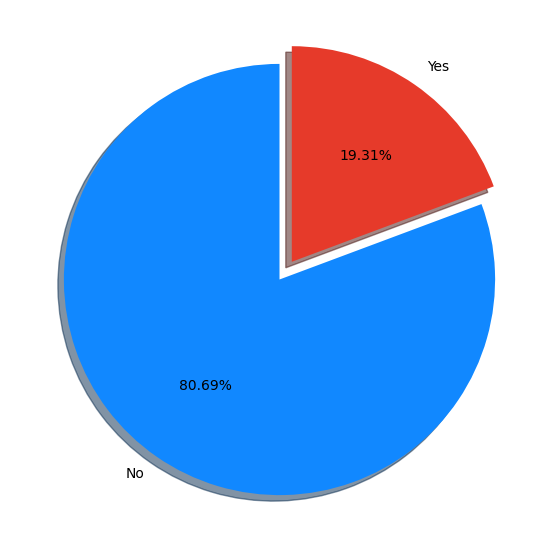

In [23]:
percentage = consumer_complaint['Consumer Disputed?'].value_counts(normalize=True)*100
labels = ["No","Yes"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(14, 7))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

**Insights**

*  As per the chart Our Target variable is  Highly **imbalanced dataset**.




###  Product and Cosumer Disputed? Relation

In [24]:
#group data by Product and Consumer disputed?
consumer_complaint.groupby('Product')['Consumer Disputed?'].value_counts(normalize=True).to_frame()*100

proportion
Product                     Consumer Disputed?            
Bank account or service     No                   81.407111
                            Yes                  18.592889
Checking or savings account No                  100.000000
Consumer Loan               No                   78.555140
                            Yes                  21.444860
Credit card                 No                   79.589411
                            Yes                  20.410589
Credit reporting            No                   84.253253
                            Yes                  15.746747
Debt collection             No                   82.407884
                            Yes                  17.592116
Money transfers             No                   85.394098
                            Yes                  14.605902
Mortgage                    No                   77.359014
                            Yes                  22.640986
Other financial service     No                   81.190926
                            Yes                  18.809074
Payday loan                 No                   85.616315
                            Yes                  14.383685
Prepaid card                No                   85.964912
                            Yes                  14.035088
Student loan                No                   81.751107
                            Yes                  18.248893
Virtual currency            No                   50.000000
                            Yes                  50.000000

###  Company Public Response and Cosumer Disputed? Relation

In [25]:
#group data by Company Public Response and Consumer disputed?
consumer_complaint.groupby('Company Public Response')['Consumer Disputed?'].value_counts(normalize=True).to_frame()*100

proportion
Company Public Response                            Consumer Disputed?            
Company Public Response  not listed                No                   79.938771
                                                   Yes                  20.061229
Company believes complaint caused principally b... No                   87.058824
                                                   Yes                  12.941176
Company believes complaint is the result of an ... No                   88.336933
                                                   Yes                  11.663067
Company believes complaint relates to a discont... No                   78.571429
                                                   Yes                  21.428571
Company believes complaint represents an opport... No                   88.273921
                                                   Yes                  11.726079
Company believes it acted appropriately as auth... No                   78.982683
                                                   Yes                  21.017317
Company believes the complaint is the result of... No                   84.404838
                                                   Yes                  15.595162
Company can't verify or dispute the facts in th... No                   81.865285
                                                   Yes                  18.134715
Company chooses not to provide a public response   No                   81.258933
                                                   Yes                  18.741067
Company disputes the facts presented in the com... No                   75.839161
                                                   Yes                  24.160839
Company has responded to the consumer and the C... No                   85.035779
                                                   Yes                  14.964221

###  Company consent provided and Cosumer Disputed? Relation

In [26]:
#group data by Company Public Response and Consumer disputed?
consumer_complaint.groupby('Consumer Consent Provided?')['Consumer Disputed?'].value_counts(normalize=True).to_frame()*100

proportion
Consumer Consent Provided? Consumer Disputed?            
Consent not provided       No                   82.483820
                           Yes                  17.516180
Consent provided           No                   78.169216
                           Yes                  21.830784
Consent withdrawn          No                   87.500000
                           Yes                  12.500000
Other                      No                   79.507517
                           Yes                  20.492483
data not listed            No                   81.108785
                           Yes                  18.891215

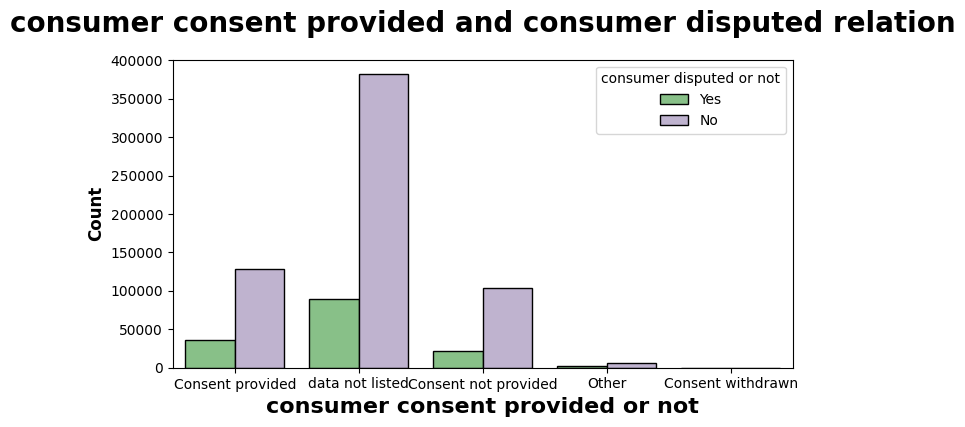

In [27]:
plt.subplots(figsize=(8,4))
sns.countplot(x="Consumer Consent Provided?",hue="Consumer Disputed?", data=consumer_complaint, ec= "black",palette="Accent")
plt.title("consumer consent provided and consumer disputed relation", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("consumer consent provided or not", weight="bold", fontsize=16)
plt.legend(title="consumer disputed or not", fancybox=True)
plt.show()

### Top 15 Company which have high Complaints Volume

In [28]:
from textwrap import wrap

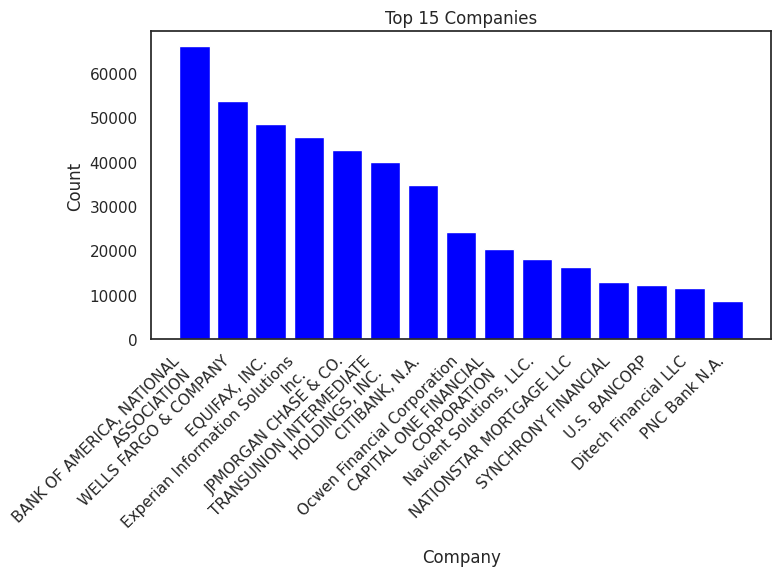

In [29]:
# Set seaborn style
sns.set(style='white')

# Compute value counts and get the top 15 companies
top_companies = consumer_complaint['Company'].str.strip("'").value_counts().nlargest(15)

# Adjust the company labels to wrap text
wrapped_company_labels = ['\n'.join(wrap(label, 30)) for label in top_companies.index]

# Plot the top 15 companies
plt.figure(figsize=(8, 4))
plt.bar(wrapped_company_labels, top_companies, color='blue')
plt.title('Top 15 Companies')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [30]:
# As per the Visualisation we have three companies which has Massive compalaints compare to others.
total = consumer_complaint['Company'].value_counts().sum()
companies_to_count = ['TRANSUNION INTERMEDIATE HOLDINGS, INC.', 'EQUIFAX, INC.', 'Experian Information Solutions Inc.']
counts = consumer_complaint['Company'].value_counts()[companies_to_count]
print('counts')
proportion = counts.sum() / total

print(proportion)


counts
0.17443083314677815


**Insights**


*   SO These companies 'TRANSUNION INTERMEDIATE HOLDINGS, INC.', 'EQUIFAX, INC.', 'Experian Information Solutions Inc.'  received maximum Complaints Around 58.48 percent.




### What are the top 15 issues and sub issues?¶





In [31]:
# Calculate and print the percentage of total complaints accounted for by the top 15 issues
top_issues = consumer_complaint['Issue'].str.strip().value_counts().nlargest(15)
percentage_top_15 = (top_issues.sum() / len(consumer_complaint)) * 100
print(f"The top 15 issues account for {percentage_top_15:.2f}% of the total data.")

The top 15 issues account for 75.12% of the total data.


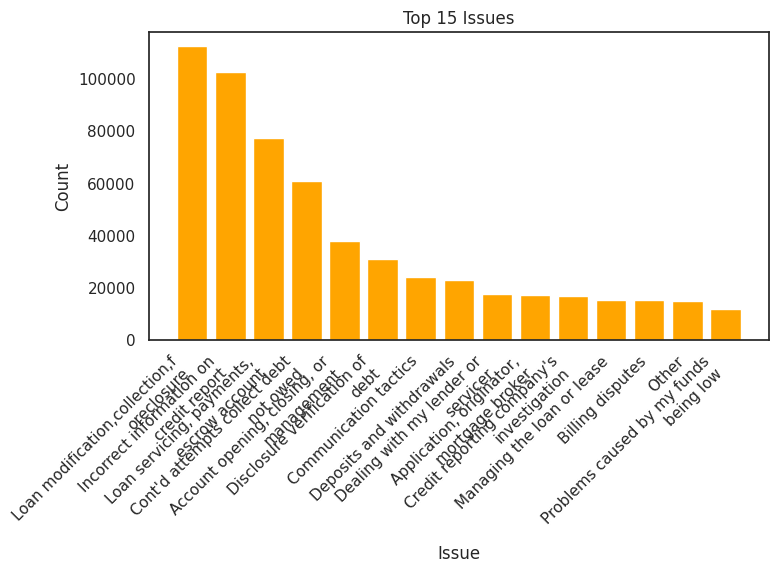

In [32]:
# Set seaborn style
sns.set(style='white')

# Compute value counts and get the top 15 issues
top_issues = consumer_complaint['Issue'].str.strip().value_counts().nlargest(15)

# Adjust the issue labels to wrap text
wrapped_labels = ['\n'.join(wrap(label, 30)) for label in top_issues.index]

# Plot the top 15 issues
plt.figure(figsize=(8, 4))
plt.bar(wrapped_labels, top_issues, color='orange')
plt.title('Top 15 Issues')
plt.xlabel('Issue')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [33]:
# Calculate and print the percentage of total complaints accounted for by the top 15 sub-issues
top_sub_issues = consumer_complaint['Sub-Issue'].str.strip().value_counts().nlargest(15)
percentage_top_15 = (top_sub_issues.sum() / len(consumer_complaint)) * 100
print(f"The top 15 sub_issues account for {percentage_top_15:.2f}% of the total data.")

The top 15 sub_issues account for 88.08% of the total data.


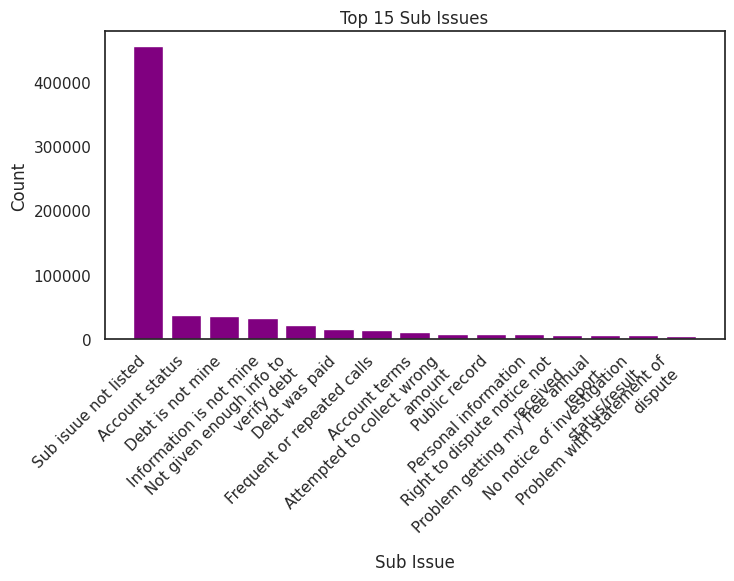

In [34]:
# Set seaborn style
sns.set(style='white')

# Compute value counts and get the top 15 sub-issues
top_sub_issues = consumer_complaint['Sub-Issue'].str.strip("'").value_counts().nlargest(15)

# Adjust the sub-issue labels to wrap text
wrapped_subissue_labels = ['\n'.join(wrap(label, 30)) for label in top_sub_issues.index]

# Plot the top 15 sub-issues
plt.figure(figsize=(8, 4))
plt.bar(wrapped_subissue_labels, top_sub_issues, color='purple')
plt.title('Top 15 Sub Issues')
plt.xlabel('Sub Issue')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

**Insights**


*   The top 15 issues account for 80.49% of the total data.

*   The top 15 sub_issues account for 78.65% of the total data.








### In which month did most complaints occur and on which day of the week are most complaints received?

In [35]:
from datetime import datetime

In [36]:
# Extracting Year, Month, and Weekdays
consumer_complaint['Year'] = consumer_complaint['Date Received'].dt.year
consumer_complaint['Month'] = consumer_complaint['Date Received'].dt.month_name()
consumer_complaint['Week_Days'] = consumer_complaint['Date Received'].dt.day_name()


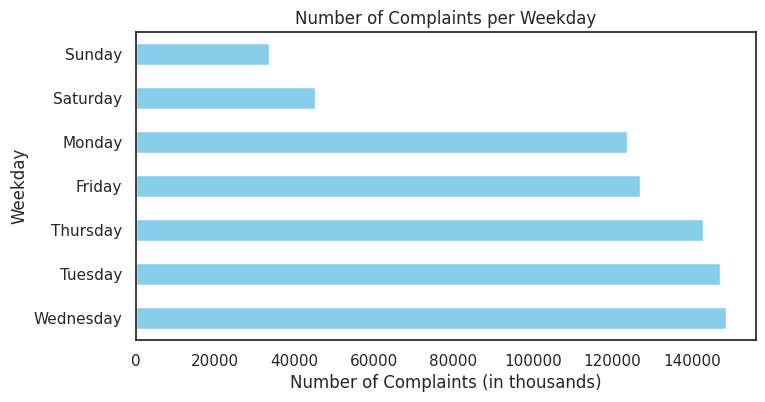

In [38]:
# Compute value counts for 'Week_Days' and plot
plt.figure(figsize=(8, 4))
week_days_counts = consumer_complaint['Week_Days'].value_counts()
week_days_counts.plot(kind='barh', color='skyblue')
plt.title('Number of Complaints per Weekday')
plt.xlabel('Number of Complaints (in thousands)')
plt.ylabel('Weekday')
# Display the plot
plt.show()

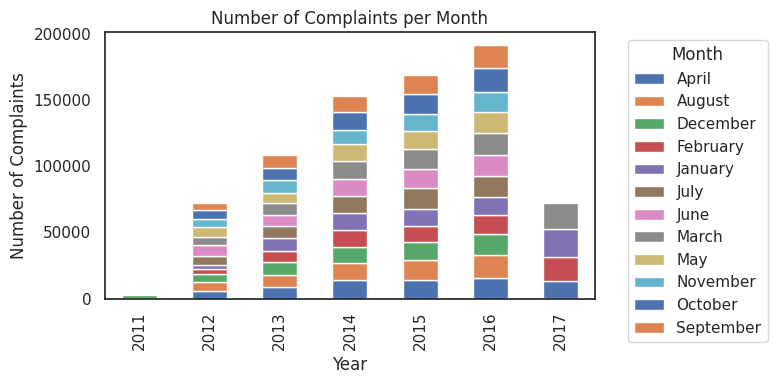

In [39]:
# Create a cross-tabulation and plot
cross_tab = pd.crosstab(consumer_complaint['Year'], consumer_complaint['Month'])

# Plotting using Matplotlib
ax = cross_tab.plot(kind='bar', stacked=True, figsize=(8, 4), title='Number of Complaints per Month')

plt.xlabel('Year')
plt.ylabel('Number of Complaints')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.tight_layout()

plt.show()



### What is the most common response received from companies?

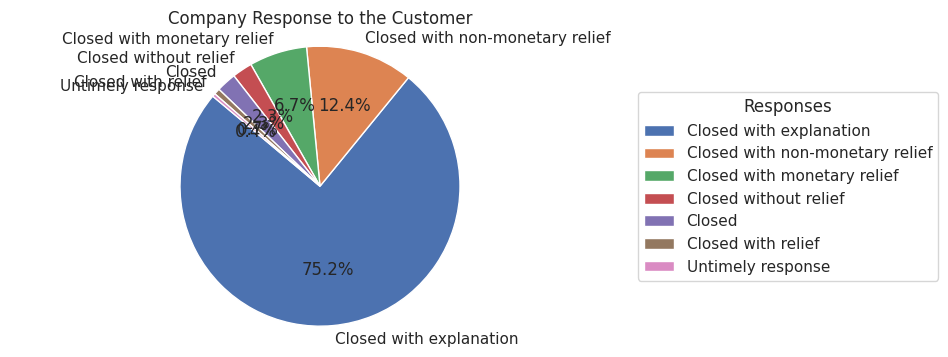

In [40]:
# Grouping the data
grouped = consumer_complaint['Company Response To Consumer'].value_counts()

# Plotting using Matplotlib
fig, ax = plt.subplots(figsize=(8, 4))
wedges, texts, autotexts = ax.pie(grouped, labels=grouped.index, autopct='%1.1f%%', startangle=140)

# Adding a title
plt.title('Company Response to the Customer')

# Adding a legend
ax.legend(wedges, grouped.index, title="Responses", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Ensuring the pie chart is drawn as a circle
plt.axis('equal')

plt.show()


### Which state received the largest number of complaints?

In [41]:
state_complaints = consumer_complaint['State'].value_counts().reset_index()
state_complaints.columns = ['State', 'Complaints']
state_complaints

,State,Complaints
0,CA,110612
1,FL,73585
2,TX,59399
3,NY,52530
4,GA,36238
...,...,...
58,MP,31
59,MH,30
60,AS,25
61,PW,13


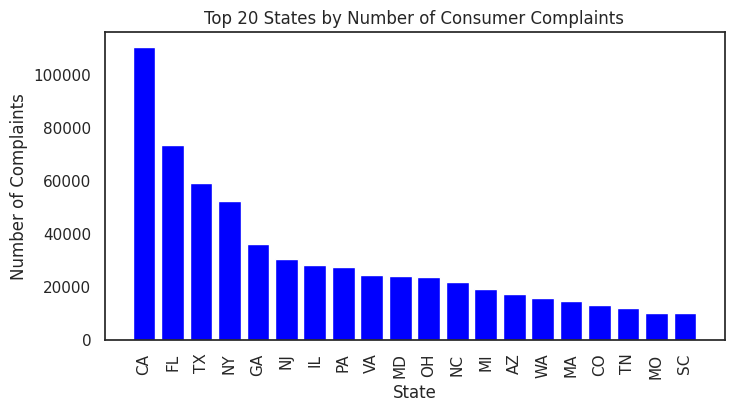

In [42]:
# Select the top 20 states
top_20_states = state_complaints.head(20)

# Plot the data
plt.figure(figsize=(8, 4))
plt.bar(top_20_states['State'], top_20_states['Complaints'], color='blue')
plt.xlabel('State')
plt.ylabel('Number of Complaints')
plt.title('Top 20 States by Number of Consumer Complaints')
plt.xticks(rotation=90)
plt.show()